# Import

In [1]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity
from numpy import linalg as LA
from tqdm import tqdm

# Functions

In [2]:
def centralize_array(array):
    return array - np.mean(array, axis=0)

In [3]:
def normarize_array(array):
    return array / np.sqrt(np.sum(array * array, axis=1).reshape(-1, 1))

In [4]:
def normarize_vector(vector):
    return vector / np.sqrt(np.sum(vector * vector))

In [5]:
def get_average_vector(vectors):
    sum_vector = np.sum(vectors, axis=0)
    return normarize_vector(sum_vector)

# Read data

In [6]:
ag_news_df = pd.read_csv(
    "../data/CharCnn_Keras-master/data/ag_news_csv/train.csv",
    header=None,
    names=["class", "title", "description"],
)

In [7]:
dim_nums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 80, 160, 320, 640]

In [8]:
class_nums = range(1, 5)

# get similarity

100%|██████████| 15/15 [10:37<00:00, 42.52s/it] 


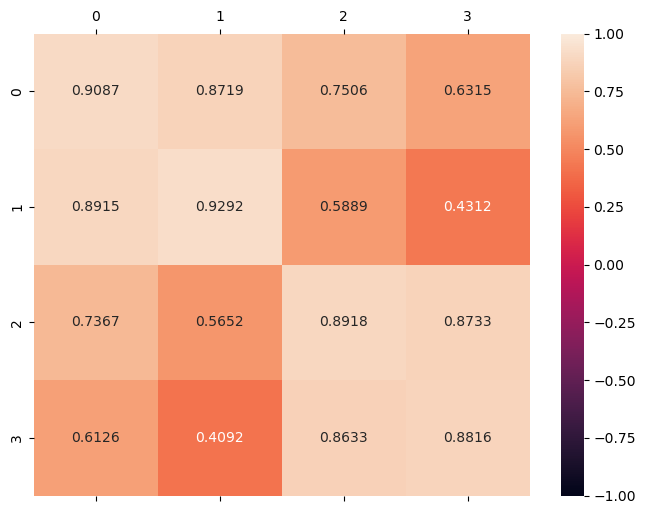

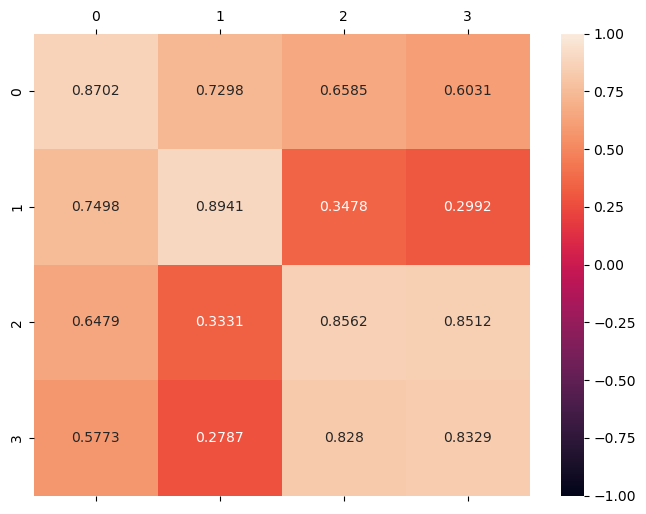

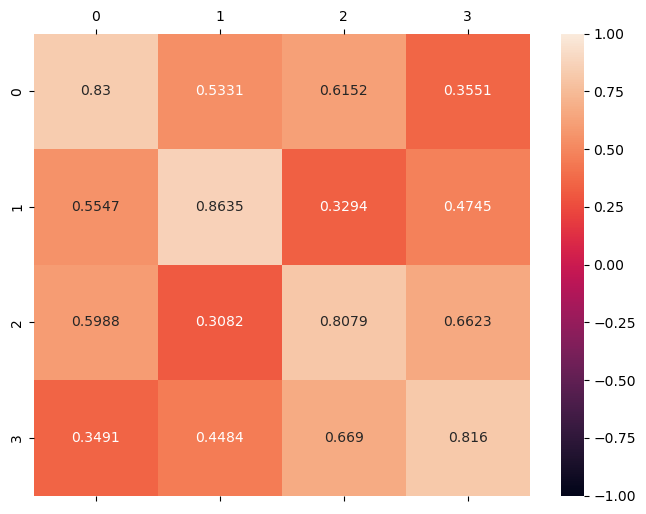

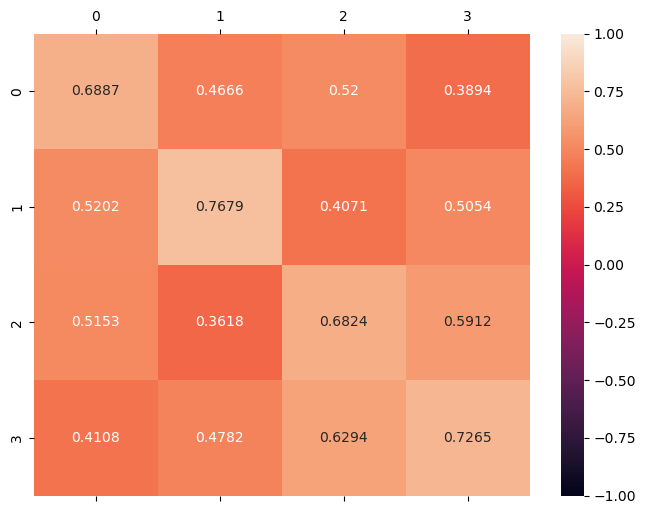

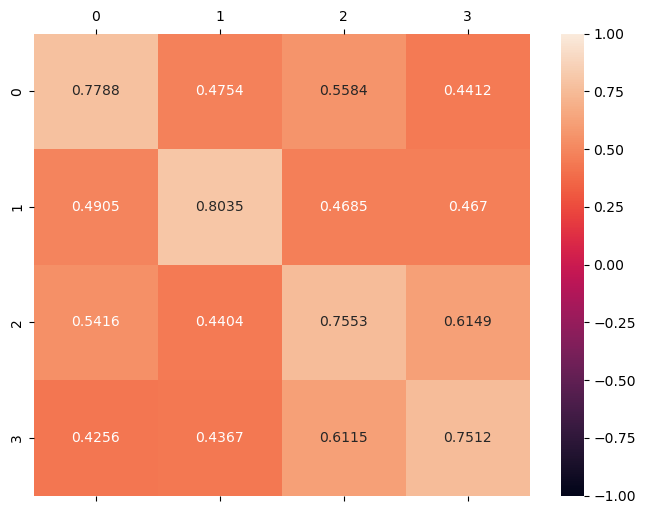

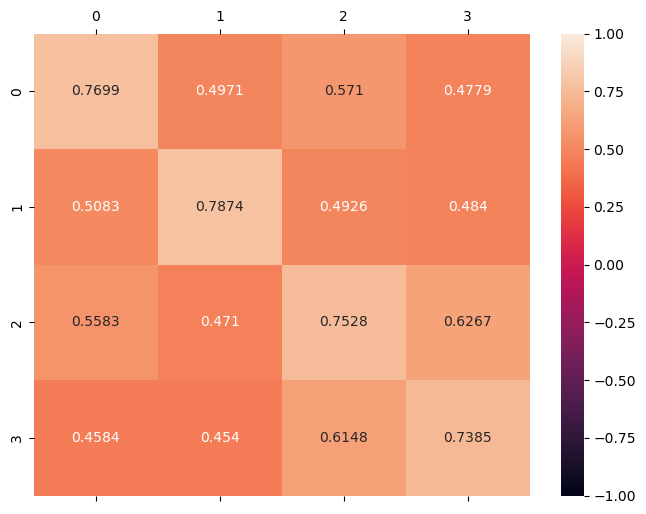

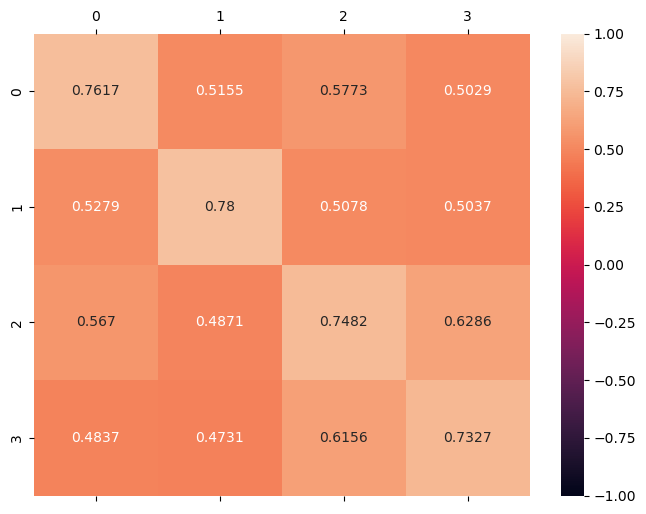

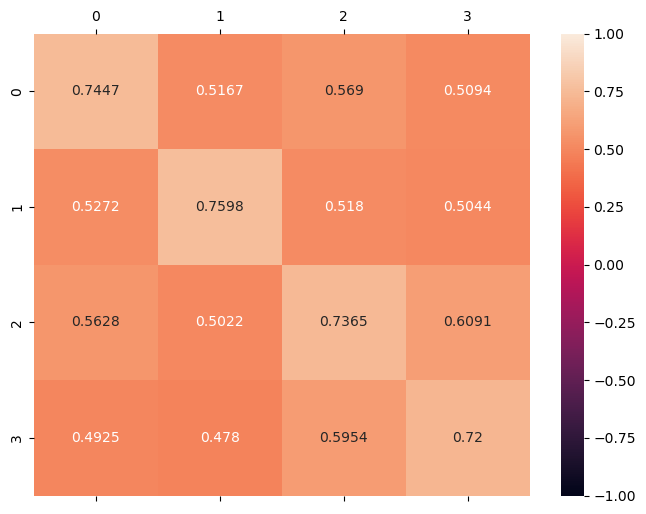

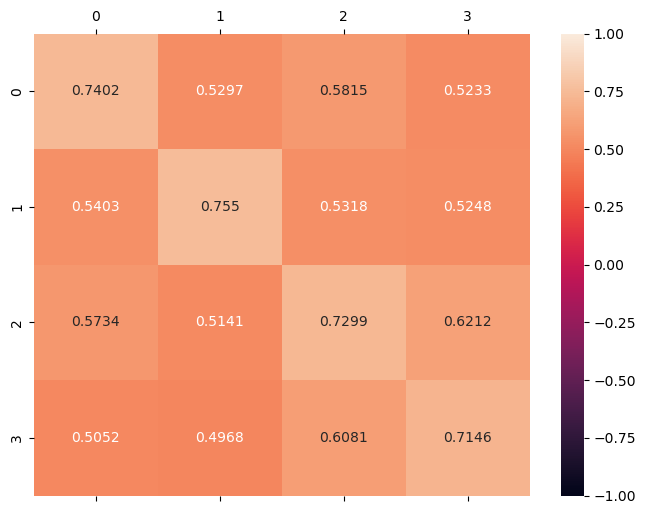

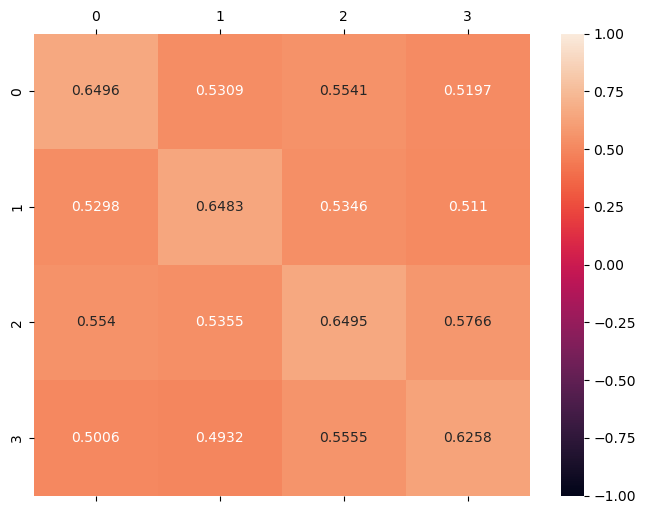

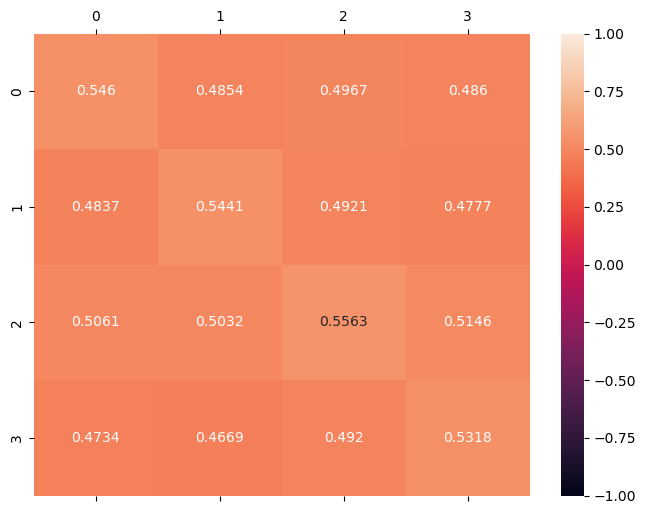

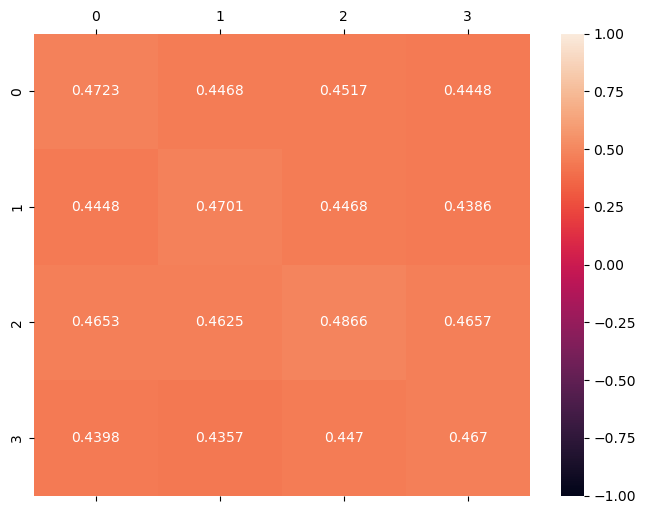

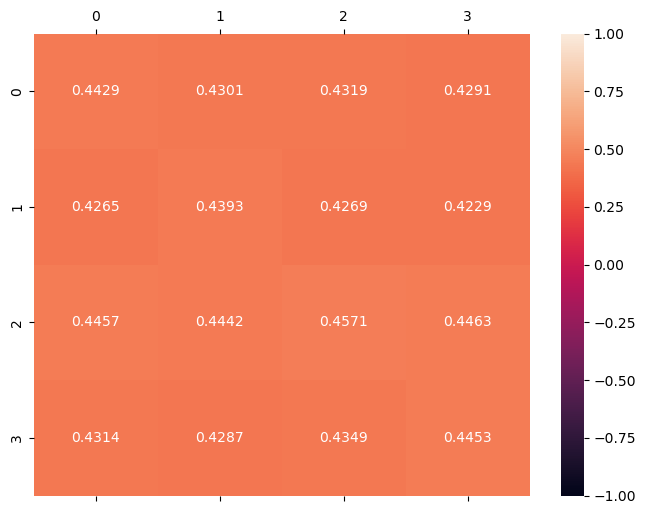

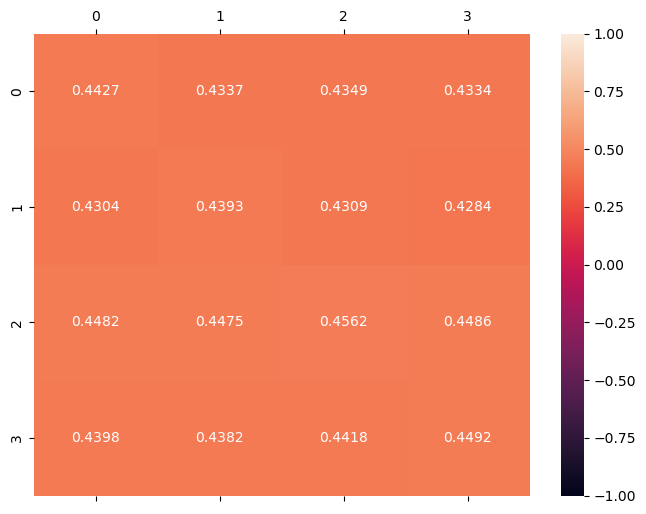

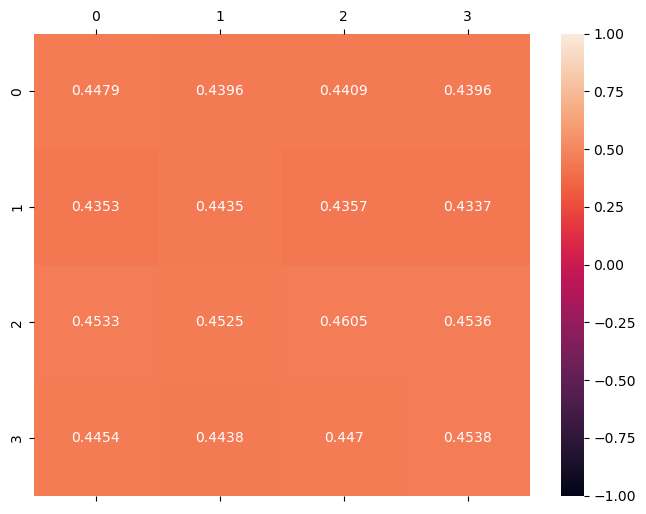

In [15]:
#cosine sim
for dim_num in tqdm(dim_nums):
    # read vectors
    text_vectors = np.loadtxt(f"./data/vector/{dim_num}.csv", delimiter=',')
    #preprocessing
    centralized_vectors = centralize_array(text_vectors)
    normarized_vectors = normarize_array(text_vectors)
    # get average vectors
    average_vectors = dict()
    for average_class in class_nums:
        class_vectors = normarized_vectors[
            ag_news_df[ag_news_df["class"] == average_class].index
        ]
        average_vectors[average_class] = get_average_vector(class_vectors)
    #get cross cosine similarity
    cross_cosine_similarity = list()
    for class_num in class_nums: 
        average_vector = np.stack(list(average_vectors.values()))
        class_vectors = normarized_vectors[ag_news_df[ag_news_df["class"] == class_num].index]
        cross_cosine_similarity.append(cosine_similarity(
            average_vector,
            class_vectors
        ))
    cross_cosine_similarity = np.stack(cross_cosine_similarity)
    # get average argument
    average_cosine_sim = np.average(cross_cosine_similarity, axis=2)
    average_cosine_sim_df = pd.DataFrame(average_cosine_sim)
    # plot figure
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position("both")

    sns.heatmap(average_cosine_sim_df, vmin=-1, vmax=1, annot=True, fmt=".4g", ax=ax)
    plt.savefig(f'data/figure/similarity_matrix/{dim_num}_cosine_sim.jpeg')
    # get norm
    sim_matrix = (average_cosine_sim_df + 1 - 2*np.identity(4)) /2
    norms = [LA.norm(sim_matrix, norm_dim) for norm_dim in norm_dims]
    norm_df[dim_num] = norms

In [11]:
norm_df.to_csv('data/norm_cosine_sim.csv')

100%|██████████| 15/15 [11:37<00:00, 46.47s/it] 


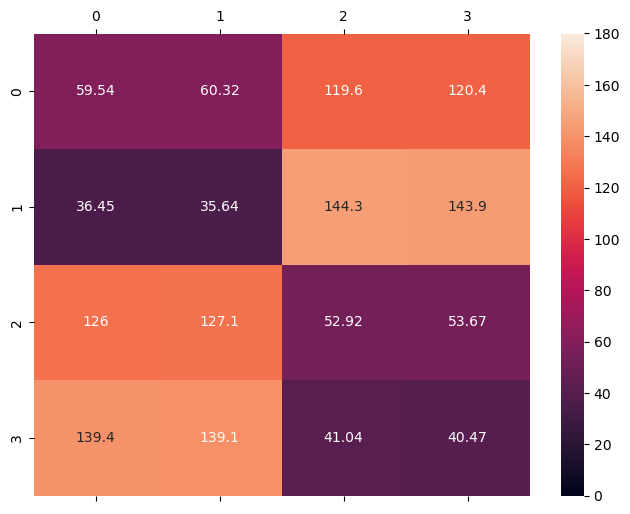

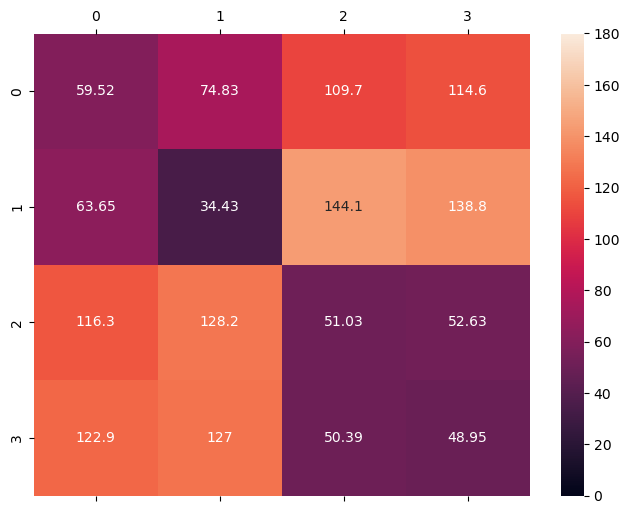

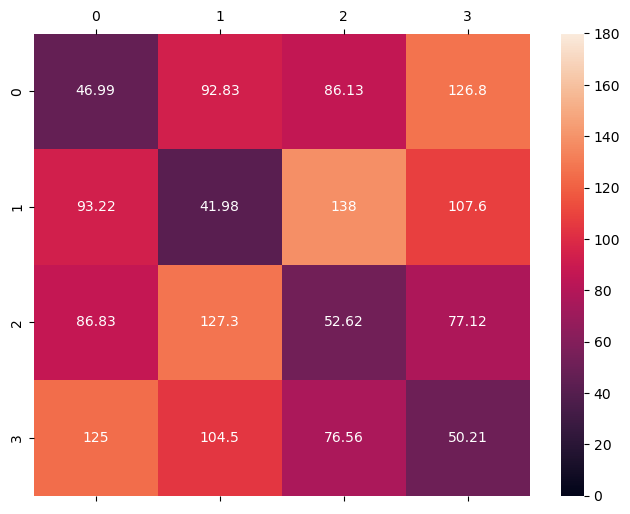

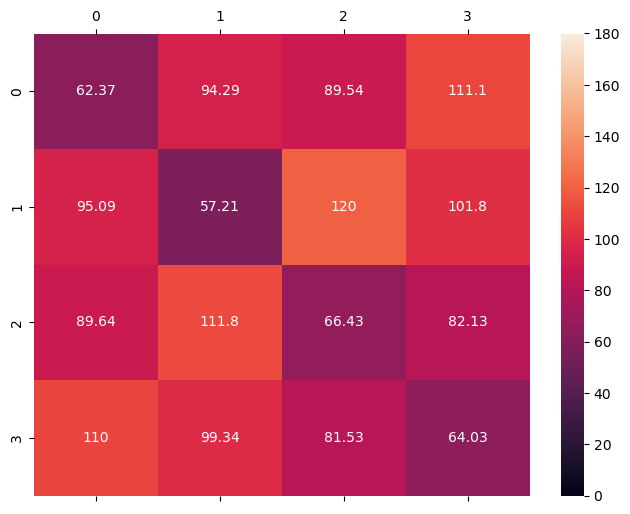

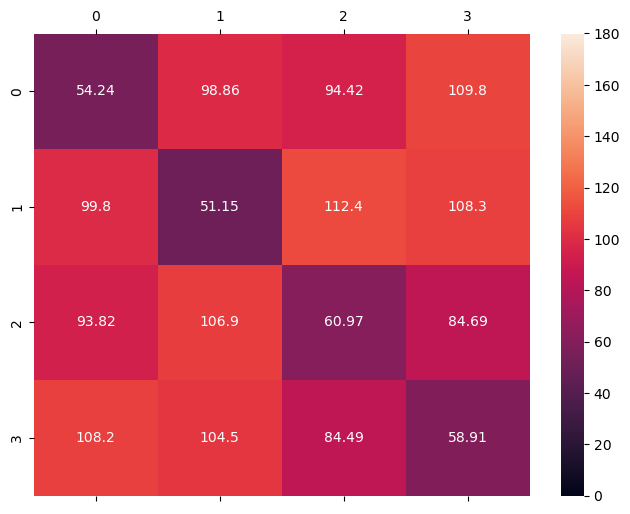

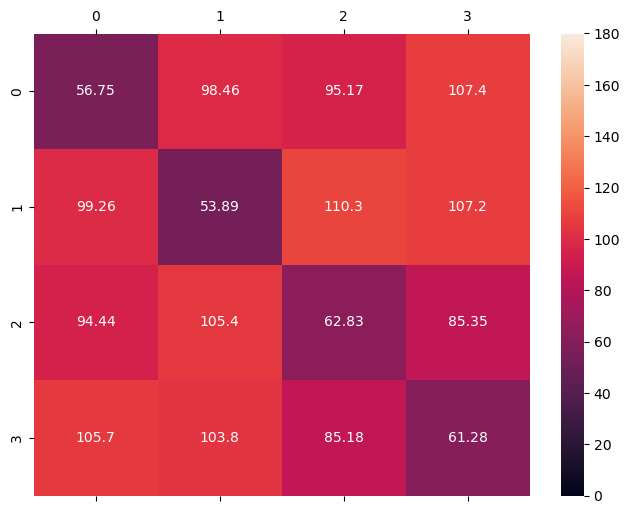

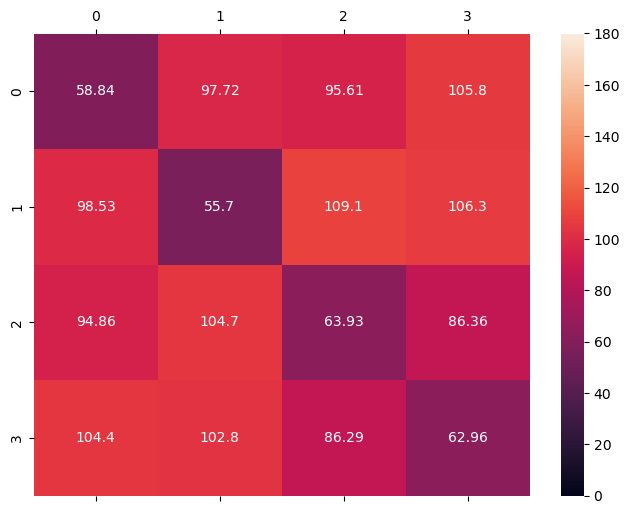

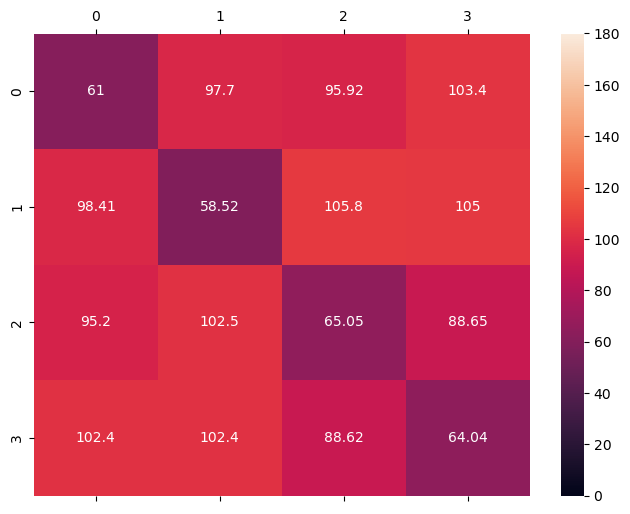

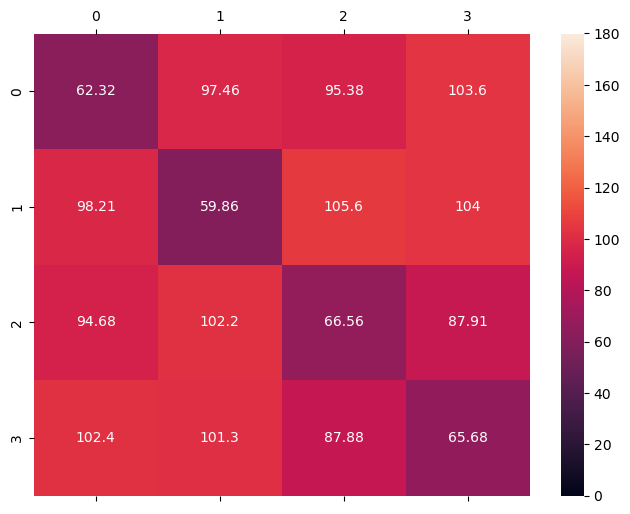

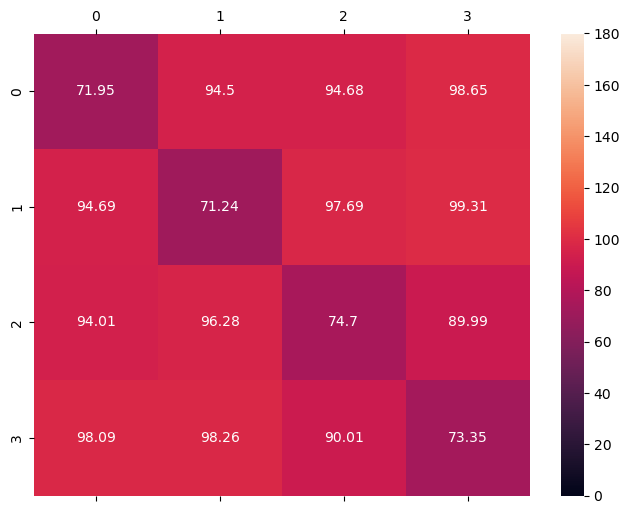

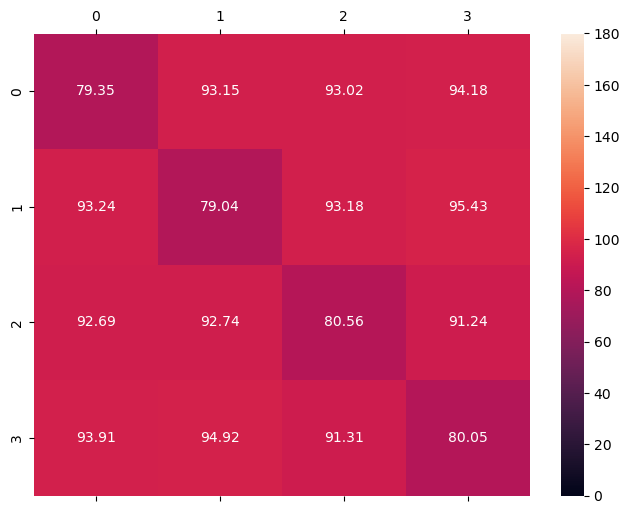

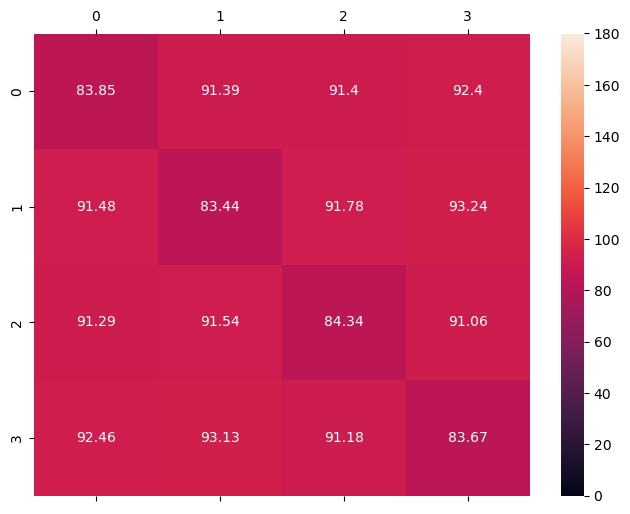

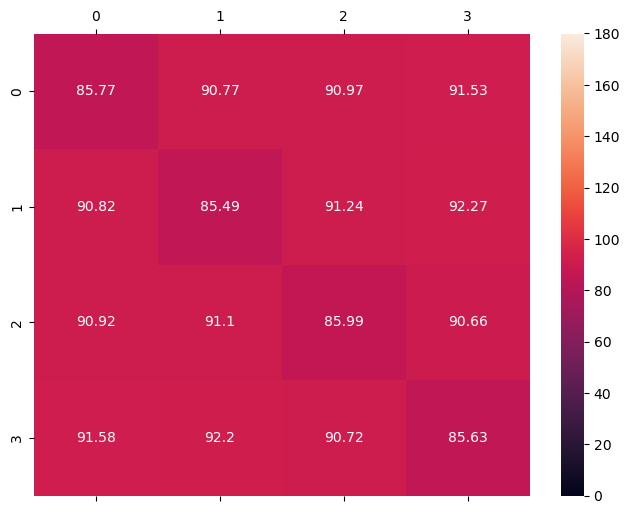

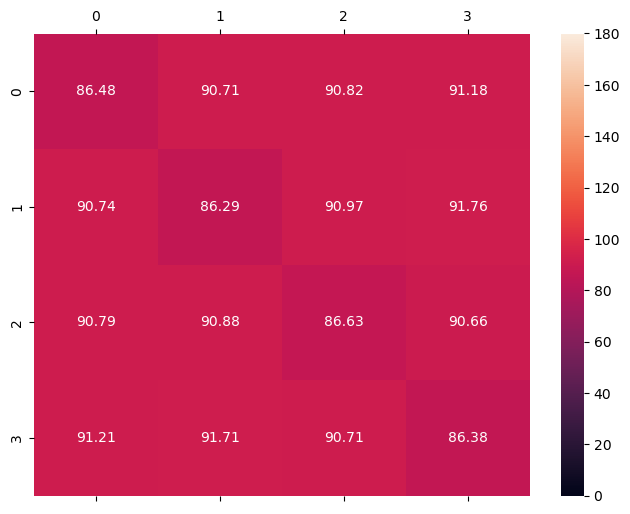

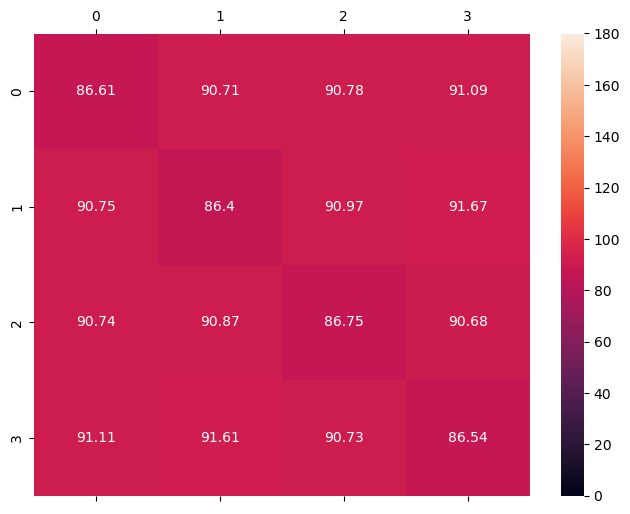

In [10]:
# argument

# for dim_num in tqdm(dim_nums):
#     # read vectors
#     text_vectors = np.loadtxt(f"./data/vector/{dim_num}.csv", delimiter=',')
#     #preprocessing
#     centralized_vectors = centralize_array(text_vectors)
#     normarized_vectors = normarize_array(centralized_vectors)
#     # get average vectors
#     average_vectors = dict()
#     for average_class in class_nums:
#         class_vectors = normarized_vectors[
#             ag_news_df[ag_news_df["class"] == average_class].index
#         ]
#         average_vectors[average_class] = get_average_vector(class_vectors)
#     #get cross cosine similarity
#     cross_cosine_similarity = list()
#     for class_num in class_nums: 
#         _average_vectors = np.stack(list(average_vectors.values()))
#         class_vectors = normarized_vectors[ag_news_df[ag_news_df["class"] == class_num].index]
#         cross_cosine_similarity.append(cosine_similarity(
#             _average_vectors,
#             class_vectors
#         ))
#     cross_cosine_similarity = np.stack(cross_cosine_similarity)
#     # get average argument
#     cross_argument = np.arccos(cross_cosine_similarity)
#     average_argument = np.average(cross_argument, axis=2)
#     average_argument_df = pd.DataFrame(average_argument)
#     # plot figure
#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111)

#     ax.xaxis.tick_top()
#     ax.xaxis.set_ticks_position("both")

#     sns.heatmap(average_argument_df * 180/ np.pi, vmin=0, vmax=180, annot=True, fmt=".4g", ax=ax)
#     plt.savefig(f'data/figure/similarity_matrix/{dim_num}_centralized.jpeg')
#     # get norm
#     sim_matrix = 1 - average_argument_df / np.pi
#     norms = [LA.norm(sim_matrix - np.identity(4), norm_dim) for norm_dim in norm_dims]
#     norm_df[dim_num] = norms

In [11]:
norm_df.to_csv('data/norm_centralized.csv')

In [12]:
norm_df.set_index(0).idxmin(axis=1)

0
1        4
2      160
fro    160
inf      4
dtype: int64

In [13]:
norm_df

,0,2,3,4,5,6,7,8,9,10,20,40,80,160,320,640
0,1,5.332119,5.104798,4.805760,4.874085,4.883178,4.925537,4.952500,4.945905,4.991433,4.994610,4.946565,4.881941,4.863716,4.880147,4.892341
1,2,4.963180,4.596976,4.305023,4.166373,4.266132,4.316603,4.353908,4.336955,4.372937,4.242565,4.014302,3.821540,3.745913,3.760923,3.781658
2,fro,5.869729,5.508154,5.196821,5.175727,5.212964,5.283287,5.334162,5.334441,5.382877,5.358691,5.240954,5.129062,5.086930,5.102772,5.118966
3,inf,5.345268,5.121152,4.761471,4.791906,4.841567,4.903115,4.934551,4.937472,4.978743,5.016608,4.967685,4.906881,4.879094,4.888145,4.898823


<AxesSubplot: >

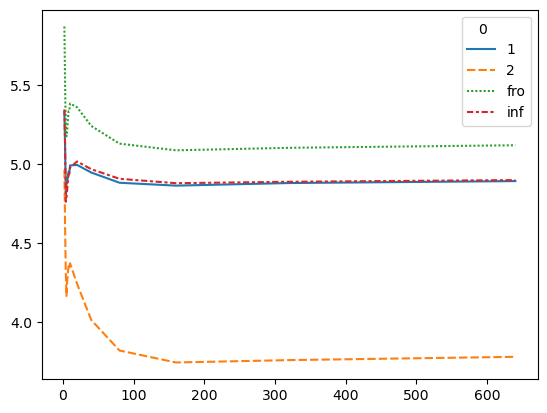

In [14]:
sns.lineplot(norm_df.set_index(0).T)